2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a. Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results
using confusion matrix.

In [1]:
!pip install keras tensorflow scikit-learn seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Pre-processing
# Reshape data to fit the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the pixel values to be between 0 and 1
X_train /= 255
X_test /= 255

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


Epoch 1/10


375/375 [==============================] - 20s 48ms/step - loss: 0.2480 - accuracy: 0.9280 - val_loss: 0.0926 - val_accuracy: 0.9747
Epoch 2/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0754 - accuracy: 0.9783 - val_loss: 0.0695 - val_accuracy: 0.9811
Epoch 3/10
375/375 [==============================] - 18s 48ms/step - loss: 0.0518 - accuracy: 0.9850 - val_loss: 0.0641 - val_accuracy: 0.9822
Epoch 4/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 5/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0539 - val_accuracy: 0.9850
Epoch 6/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0596 - val_accuracy: 0.9838
Epoch 7/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.0604 - val_accura

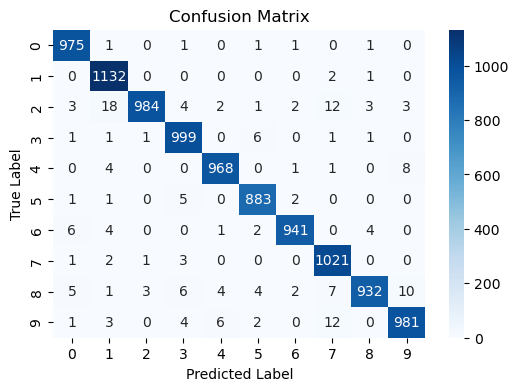

In [7]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()